### *Descripción de las variables*

- **survived**: Booleano que identifica si el pasajero sobrevivió (0 = NO, 1 = SI)
- **pclass**: Clase de ticket del pasajero, 1ra, 2da o 3ra clase (siendo la 1ra la más cara y la posicionada más alta en el barco y la 3ra la económica y la posicionada más abajo en el barco).
- **name**: Nombre del pasajero
- **sex**: Sexo del pasajero (male o female)
- **age**: Edad del pasajero
- **sibsp**: Número de hermanos o esposo/a abordo del titanic
- **parch**: Número de padres/hijos abordo del titanic
- **fare**: Precio del ticket
- **deck**(Cabin): Identificador de la cabina correspondiente a su ticket.
- **embark_town**(Embarked): Puerto de embarcación (C = Cherbourg, Q = Queenstown, S = Southampton)
- **adult_male** True si es hombre y su edad es mayor que 18.

### *Indice del trabajo*

- [Titanic](#Titanic)
  - [Preprocesamiento](#Preprocesamiento)
  
    - [1. Cargar archivo](#1.-Cargar-archivo)
    
    - [2. Analisis exploratorio de datos](#2.-Analisis-exploratorio-de-datos)
          - [2.1. Características de las variables](#2.1.-Características-de-las-variables)
          - [2.2. Valores únicos (V. categóricas)](#2.2.-Valores-únicos-(V.-categóricas))         
          - [2.3. Estadísticos descriptivos](#2.3.-Estadísticos-descriptivos)
          - [2.4. Análisis gráfico](#2.4.-Análisis-gráfico)
              - [2.4.1. Univariado](#2.4.1.-Univariado)
              - [2.4.2. Bivariado](#2.4.2.-Bivariado)
        
    - [3. Transformaciones](#3.-Transformaciones)
          - [3.1. Agregación](#3.1.-Agregación)
          - [3.2. Transformación de Box Cox](#3.2.-Transformación-de-Box-Cox)  
          
    - [4. Limpieza de datos](#4.-Limpieza-de-datos)
          - [4.1. Inconsistencias](#4.1.-Inconsistencias)
          - [4.2. Imputar Valores perdidos](#4.2.-Imputar-Valores-perdidos)        
          
    - [5. Filtro (Elección de atributos)](#5.-Filtro-(Elección-de-atributos))
          - [5.1. Inutilidad](#5.1.-Inutilidad)
          - [5.2. Redundancia](#5.2.-Redundancia)         
          - [5.3. Relevancia](#5.3.-Relevancia)           
          - [5.4. Normalización](#5.4.-Normalización)           


In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression 
import statsmodels.api as srm 

## Preprocesamiento

### 1. Cargar archivo

In [2]:
df_train = pd.read_csv('train.csv')
x_test  = pd.read_csv('test.csv')
y_test  = pd.read_csv('gender_submission.csv')

df_test = pd.merge(y_test,x_test, how='left')
df= pd.merge(df_train,df_test, how = 'outer')
df.shape

(1309, 12)

### 2. Analisis exploratorio de datos

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns = ['passengerid','survived','pclass', 'name', 'sex', 'age','sibsp','parch','ticket','fare','cabin','embarked'] 

#### 2.1. Características de las variables

In [5]:
a = pd.DataFrame({
    'tipo de datos': df.dtypes,
    'valores nulos': df.isnull().sum(),
    'porcentaje de valores nulos': ((df.isnull().sum() / len(df)) * 100).round(1)
})
print(tabulate(a, headers='keys', tablefmt='grid'))

+-------------+-----------------+-----------------+-------------------------------+
|             | tipo de datos   |   valores nulos |   porcentaje de valores nulos |
+=============+=================+=================+===============================+
| passengerid | int64           |               0 |                           0   |
+-------------+-----------------+-----------------+-------------------------------+
| survived    | int64           |               0 |                           0   |
+-------------+-----------------+-----------------+-------------------------------+
| pclass      | int64           |               0 |                           0   |
+-------------+-----------------+-----------------+-------------------------------+
| name        | object          |               0 |                           0   |
+-------------+-----------------+-----------------+-------------------------------+
| sex         | object          |               0 |                         

**Variables de tipo Cualitativos:**
- ""     
    - *Nominales*:
        - name
        - sex
        - ticket
        - cabin
        - embarked    

**Variables de tipo cuantitativo:**

- **Discretos**:
    - *Nominales*:    
        - survived
    - *Ordinales*:    
        - pclass
    - *De intervalo*:    
        - sibSp
        - parch
    
- **Continuos**:
    - *De Razón*:    
        - passengerId
        - age
        - fare

#### 2.2. Valores únicos (V. categóricas)

In [6]:
valores = df.columns.difference(['passengerid', 'age', 'fare'])
for valor in valores:
    print('')
    print(f'Valores únicos en la columna "{valor}": {df[valor].unique()}')


Valores únicos en la columna "cabin": [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148' 'B45'

Eliminamos las columnas Passengerid y ticket ya que no vemos que aporte al modelo:

In [7]:
del df['passengerid']
del df['ticket']

Si desea puede volver a correr el codigo anterior para volver analizar los valores unicos de las variables categoricas y discretas.

Nos damos cuenta de que el atributo cabin contiene varias categorias, como tambien se vizualizó anteriormente este contiene valores nulos mayor al 50% lo cual es candidato de eliminación de variable. Sin embargo, debemos de asegurarnos de esto, si es posible convertir este atributo en dummy (0 = valor nulo y 1 si es contrario)

#### 2.3. Estadísticos descriptivos

In [8]:
df.describe(include = 'all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,1309.0,NaN,NaN,NaN,0.38,0.48,0.0,0.0,0.0,1.0,1.0
pclass,1309.0,NaN,NaN,NaN,2.29,0.84,1.0,2.0,3.0,3.0,3.0
name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1046.0,NaN,NaN,NaN,29.88,14.41,0.17,21.0,28.0,39.0,80.0
sibsp,1309.0,NaN,NaN,NaN,0.5,1.04,0.0,0.0,0.0,1.0,8.0
parch,1309.0,NaN,NaN,NaN,0.39,0.87,0.0,0.0,0.0,0.0,9.0
fare,1308.0,NaN,NaN,NaN,33.3,51.76,0.0,7.9,14.45,31.28,512.33
cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
embarked,1307,3,S,914,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2.4. Análisis gráfico

##### 2.4.1. Univariado

Se realiza el gráfico para las variables de escala nominal, excepto name y cabin:

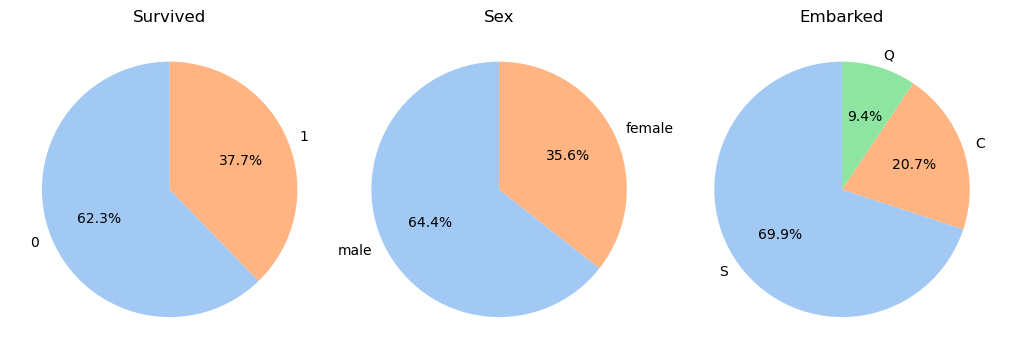

In [9]:
recuento_survived = df['survived'].value_counts()
recuento_sex      = df['sex'].value_counts()
recuento_embarked = df['embarked'].value_counts()

fig, axs = plt.subplots(1,3, figsize = (10, 4), layout = 'constrained')
colors = sns.color_palette('pastel')
axs[0].pie(recuento_survived, labels=recuento_survived.index, colors=colors, autopct='%1.1f%%', startangle=90)
axs[1].pie(recuento_sex, labels=recuento_sex.index, colors = colors ,autopct='%1.1f%%', startangle=90)
axs[2].pie(recuento_embarked, labels=recuento_embarked.index, colors = colors ,autopct='%1.1f%%', startangle=90)

axs[0].set_title('Survived')
axs[1].set_title('Sex')
axs[2].set_title('Embarked')
plt.show()

Se realiza el gráfico para la variable de escala ordinal, pclass:

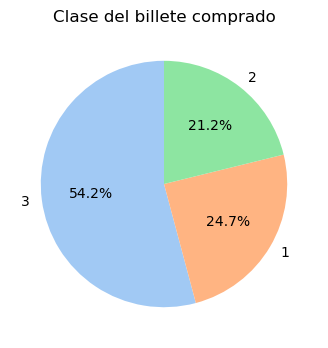

In [10]:
recuento_pclass = df['pclass'].value_counts()
plt.figure(figsize = (5,4))
colors = sns.color_palette('pastel')
plt.pie(recuento_pclass, labels=recuento_pclass.index, colors = colors ,autopct='%1.1f%%', startangle=90)
plt.title('Clase del billete comprado')
plt.show()

Se realiza los graficos de las variables con escala de intervalo:

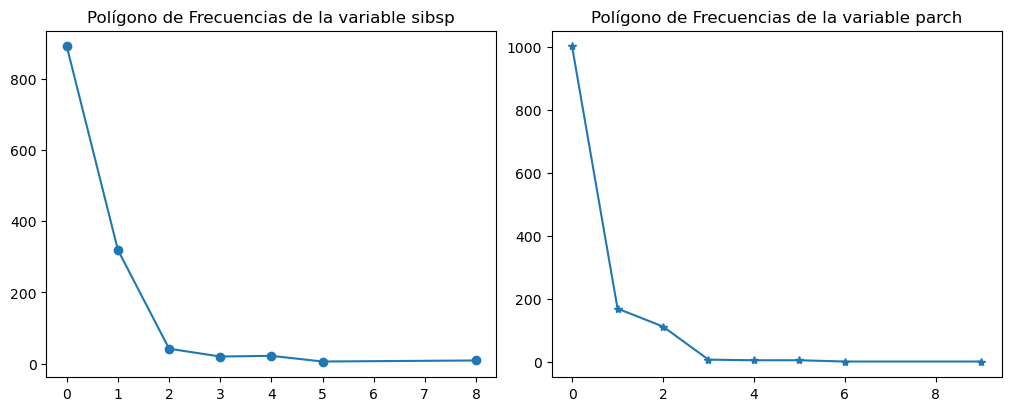

In [11]:
valores_unicos_sibsp = sorted(df['sibsp'].unique())
valores_unicos_parch = sorted(df['parch'].unique())
frecuencias_sibsp = df['sibsp'].value_counts().loc[valores_unicos_sibsp]
frecuencias_parch = df['parch'].value_counts().loc[valores_unicos_parch]
fig, axs = plt.subplots(1,2, figsize =(10, 4), layout = 'constrained')
axs[0].plot(valores_unicos_sibsp, frecuencias_sibsp, marker='o', linestyle='-')
axs[1].plot(valores_unicos_parch, frecuencias_parch, marker='*', linestyle='-')
axs[0].set_title("Polígono de Frecuencias de la variable sibsp")
axs[1].set_title("Polígono de Frecuencias de la variable parch")
plt.show()

Se realiza los graficos de las variables con escala de razón:

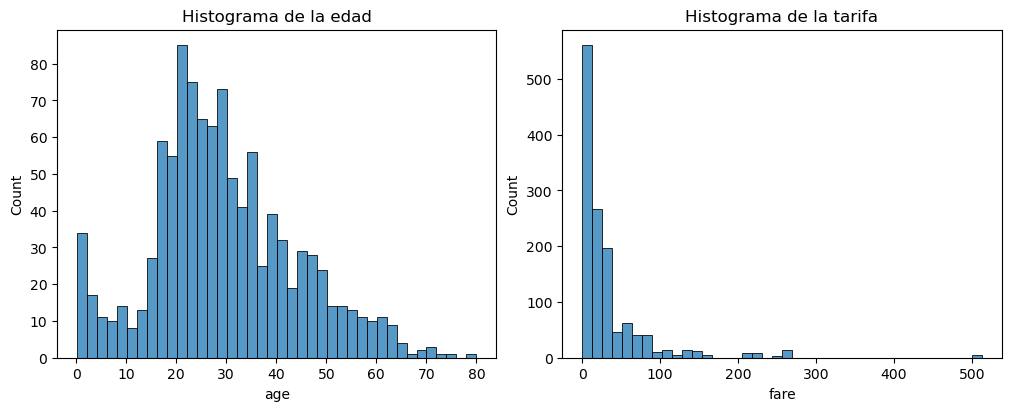

In [12]:
fig,axs=plt.subplots(1,2,figsize=(10,4),layout='constrained')
sns.histplot(data=df,x='age',bins=40,ax=axs[0])
sns.histplot(data=df,x='fare',bins=40,ax=axs[1])
axs[0].set_title('Histograma de la edad')
axs[1].set_title('Histograma de la tarifa')
plt.show()

##### 2.4.2. Bivariado

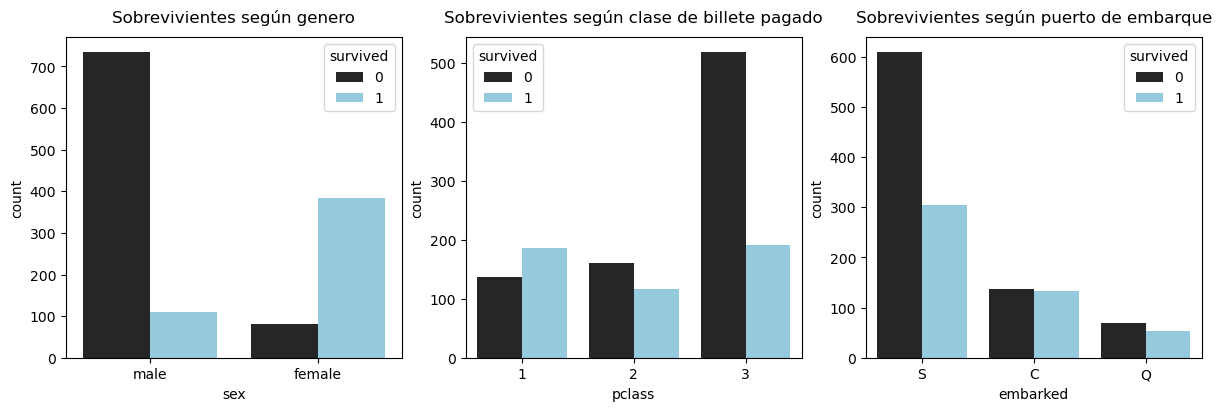

In [13]:
fig, axs = plt.subplots(1,3, figsize = (12,4), layout = 'constrained')
sns.countplot(data=df,x='sex',     hue='survived',palette='dark:skyblue',ax =axs[0] )
sns.countplot(data=df,x='pclass',  hue='survived',palette='dark:skyblue',ax =axs[1] )
sns.countplot(data=df,x='embarked',hue='survived',palette='dark:skyblue', ax=axs[2])
axs[0].set_title('Sobrevivientes según genero', y =1.02)
axs[1].set_title('Sobrevivientes según clase de billete pagado', y =1.02)
axs[2].set_title('Sobrevivientes según puerto de embarque', y =1.02)
plt.show()

De los graficos anteriores, podemos concluir que las variables sex y pclass influyeron en la sobrevivencia, teniendo las mujeres y los de posición más alto (pclass = 1) mayor porcentaje de sobrevivientes.

Text(0.5, 1.02, 'Sobrevivientes según parch')

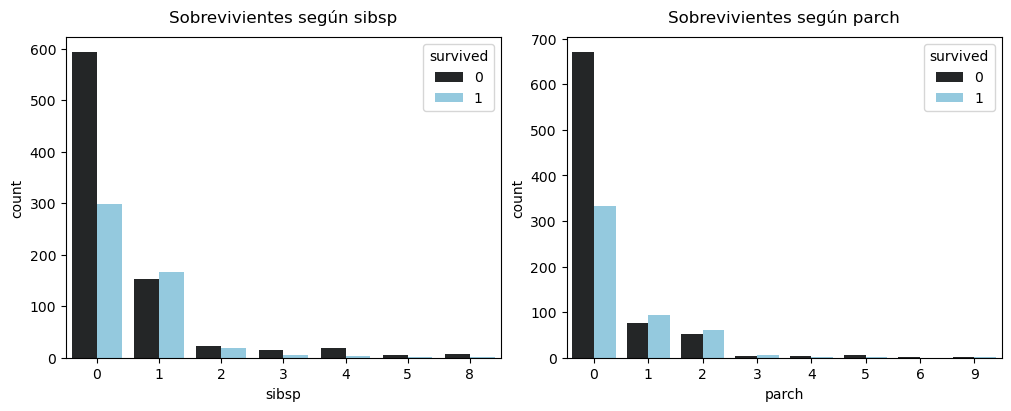

In [14]:
fig, axs = plt.subplots(1,2, figsize = (10,4), layout = 'constrained')
sns.countplot(data=df,x='sibsp',hue='survived',palette = 'dark:skyblue',ax =axs[0] )
sns.countplot(data=df,x='parch',hue='survived',palette = 'dark:skyblue',ax =axs[1] )
axs[0].set_title('Sobrevivientes según sibsp', y =1.02)
axs[1].set_title('Sobrevivientes según parch', y =1.02)

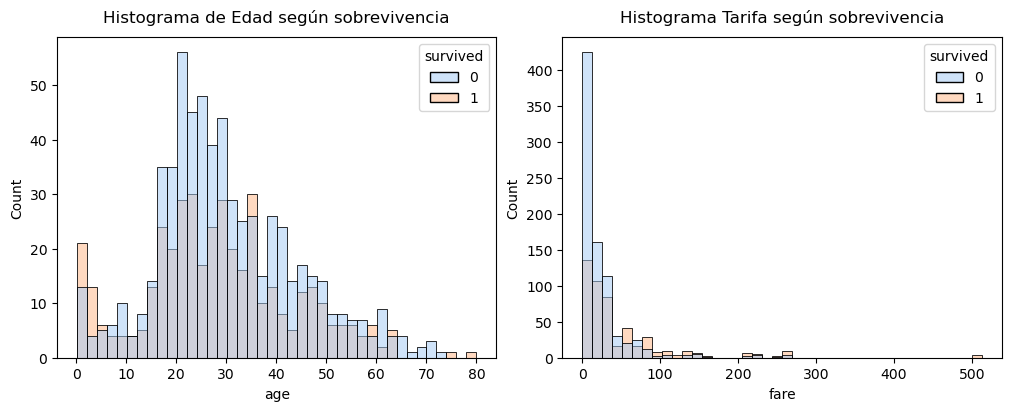

In [15]:
fig, axs = plt.subplots(1,2, figsize = (10,4), layout = 'constrained')
sns.histplot(data = df, x = 'age', hue = 'survived' ,palette = 'pastel', bins = 40, ax =axs[0] )
sns.histplot(data = df, x = 'fare',hue = 'survived' ,palette = 'pastel',bins = 40, ax =axs[1] )
axs[0].set_title('Histograma de Edad según sobrevivencia', y =1.02)
axs[1].set_title('Histograma Tarifa según sobrevivencia', y =1.02)
plt.show()

De los dos graficos anteriores, podemos concluir que hubo menor porcentaje de muertos en niños, tambien un mayor porcentaje de fallecidos del total de personas que pagaron menos tarifa por el ticket. 

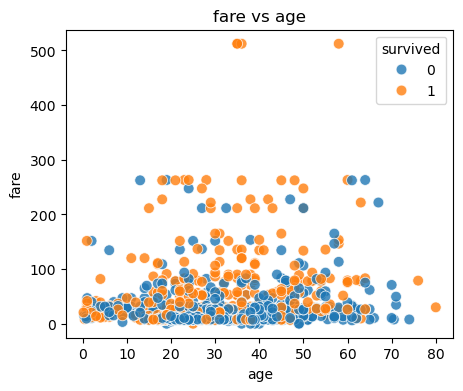

In [16]:
plt.figure(figsize=(5,4))
sns.scatterplot(data = df, x='age', y='fare', hue = 'survived', s =60, alpha = 0.8)
plt.title('fare vs age')
plt.show()

In [17]:
df.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
cabin        object
embarked     object
dtype: object

### 3. Transformaciones

#### 3.1. Agregación

Transformación de variables categóricas y/o creación de otras

La variable pclass es numerica ordinal, por lo tanto no realizamos cambios.

La variable sex es categórica, por lo tanto lo transformamos a variable dummy.

La variable sibsp y parch son numericas ordinales, de esta variable podemos crear una dummy que indique si la persona estaba solo o acompañado, tambien uno que indique el numero de familiares.

La variable embarked es cualitativa nominal, entonces transformamos a variables dummy para cada una de sus tres categorias.

Variable name: no podemos olvidar esta variable, podemos encontrar la caracteristica del titulo de cada persona (Mrs, Master, Miss, etc).

In [18]:
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df['alone'] = df.apply(lambda row: 1 if row['parch'] == 0 and row['sibsp'] == 0 else 0, axis=1)
df['embarked_s']  = df['embarked'].apply(lambda x:1 if x =='S' else 0)
df['embarked_c']  = df['embarked'].apply(lambda x:1 if x =='C' else 0)
df['embarked_q']  = df['embarked'].apply(lambda x:1 if x =='Q' else 0)

In [19]:
del df['embarked']

In [20]:
df['title'] = df.name.str.extract(' ([A-Za-z]+)\.', expand=False)

df['title'] = df['title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['title'] = df['title'].replace('Mlle', 'Miss')
df['title'] = df['title'].replace('Ms', 'Miss')
df['title'] = df['title'].replace('Mme', 'Mrs')

In [21]:
# plt.figure(figsize = (5,4))
# sns.countplot(data = df, x = 'title',  hue = 'survived',palette = 'dark:skyblue')

In [22]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['title'] = df['title'].map(title_mapping)
df['title'] = df['title'].fillna(0)

del df['name']

In [23]:
# plt.figure(figsize = (5,4))
# sns.countplot( x = 'alone',     data = df, hue = 'survived')

In [24]:
df = pd.get_dummies(df, columns=['title'])

In [25]:
df.dtypes

survived        int64
pclass          int64
sex             int64
age           float64
sibsp           int64
parch           int64
fare          float64
cabin          object
alone           int64
embarked_s      int64
embarked_c      int64
embarked_q      int64
title_1          bool
title_2          bool
title_3          bool
title_4          bool
title_5          bool
dtype: object

In [26]:
del df['embarked_q']
del df['sibsp']
del df['parch']
del df['title_5']


**Transformación de variables continuas**

Variable edad: se puede crear una nueva variable categorica en rangos de edad basado en la probabilidad de sobrevivencia, podemos segmentarlos en tres categorias, niños, ancianos y jovenes. Por ejemplo, los niños tienem menos opcion de sobrevivir, pero mayor importancia de rescate. De igual manera se usa el razonamiento para jovenes y ancianos.

Variable precio del ticket: Podemos transformar la variable a escala logaritmica, para normalizarlo, y también podemos crear una nueva variable categorica por rango de precios, podemos usar cuartiles para esta segmentación.

In [27]:
#cuartiles de la variable fare
q1 = 7.9
q2 = 14.45
q3 = 31.28

df['fare_q'] = df['fare'].apply(lambda x:1 if x<=q1 else (2 if q1<x<=q2 else (3 if q2<x<=q3 else 4)))

In [28]:
# Creación de la variable hombre mayor
df['hombre_mayor'] = df.apply(lambda x: 1 if x['sex'] == 1 and x['age'] > 18 else 0, axis=1)
# sns.countplot(x='hombre_mayor',data=df, hue = 'survived', palette = 'dark:skyblue')

#### 3.2. Transformación de Box Cox

In [29]:
df['ln_fare'] = np.log(df['fare']+1)

In [30]:
# fig, axs = plt.subplots(1,2, figsize = (10,4))
# sns.countplot(x='fare_q',data=df, hue ='survived',palette='dark:skyblue',ax=axs[0])
# sns.histplot(x='ln_fare',data=df,  hue ='survived',palette='dark:skyblue',ax=axs[1])
# plt.show

### 4. Limpieza de datos

##### 4.1. Inconsistencias

No se presentan valores inconsistentes.

##### 4.2. Imputar Valores perdidos

**Imputación de variables categoricas**

Variable *embarked*: 0.22 % de valores perdidos en la base de entrenamiento.

In [31]:
df.isnull().sum()

survived           0
pclass             0
sex                0
age              263
fare               1
cabin           1014
alone              0
embarked_s         0
embarked_c         0
title_1            0
title_2            0
title_3            0
title_4            0
fare_q             0
hombre_mayor       0
ln_fare            1
dtype: int64

In [32]:
# df["embarked"].fillna(df["embarked"].mode()[0], inplace = True)

**Imputación de variables continuas**

Variable *fare*    : 0.24 % de valores perdidos en la base de prueba.

In [33]:
df["fare"].fillna(df["fare"].median(), inplace=True)
df["ln_fare"].fillna(df["ln_fare"].median(), inplace=True)

In [34]:
# del df['embarked']
del df['fare']

In [37]:
# logit_model = srm.Logit(y_train_im, srm.add_constant(X_train_im))
# result=logit_model.fit()
# print(result.summary2())

In [38]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'cabin', 'alone', 'embarked_s',
       'embarked_c', 'title_1', 'title_2', 'title_3', 'title_4', 'fare_q',
       'hombre_mayor', 'ln_fare'],
      dtype='object')

Variable age : 19.87 % de valores perdidos en la base de entrenamiento y 20.57 % de valores perdidos en la base de prueba.

In [39]:
X_IM = df.drop(columns=['survived','cabin','fare_q']).values
y_IM = df['survived'].values

X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(X_IM, y_IM, random_state = 16, test_size = 0.20)

In [40]:
X_IM = df.drop(columns=['survived','cabin','fare_q']).values
y_IM = df['survived'].values

X_train_im, X_test_im, y_train_im, y_test_im = train_test_split(X_IM, y_IM, random_state = 16, test_size = 0.20)

iterativeImputer = IterativeImputer(estimator = LinearRegression(), 
                                    missing_values = np.nan,
                                    sample_posterior = False,
                                    max_iter = 10,
                                    n_nearest_features = None,
                                    imputation_order = 'ascending',
                                    skip_complete = False,
                                    min_value = 0,
                                    max_value = 100,
                                    random_state = None,
                                    add_indicator = False)

X_train_im = iterativeImputer.fit_transform(X_train_im)
X_test_im = iterativeImputer.transform(X_test_im)

X_train_im = pd.DataFrame(X_train_im)
X_test_im = pd.DataFrame(X_test_im)
y_train_im = pd.DataFrame(y_train_im)
y_test_im = pd.DataFrame(y_test_im)

X_im = pd.concat([X_train_im, X_test_im], axis =0)
y_im = pd.concat([y_train_im, y_test_im], axis =0)

df_imput = pd.concat([y_im, X_im], axis =1)

In [41]:
df_imput.reset_index()

,index,0,0,1,2,3,4,5,6,7,8,9,10,11
0,0,1,3.0,0.0,23.353068,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.183711
1,1,1,1.0,1.0,28.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.316003
2,2,0,3.0,0.0,28.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.734368
3,3,0,2.0,1.0,39.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.639057
4,4,0,3.0,1.0,22.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,257,0,3.0,1.0,12.562077,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.839078
1305,258,0,3.0,1.0,42.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.241156
1306,259,0,2.0,1.0,31.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.305054
1307,260,1,3.0,1.0,18.000000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.202765


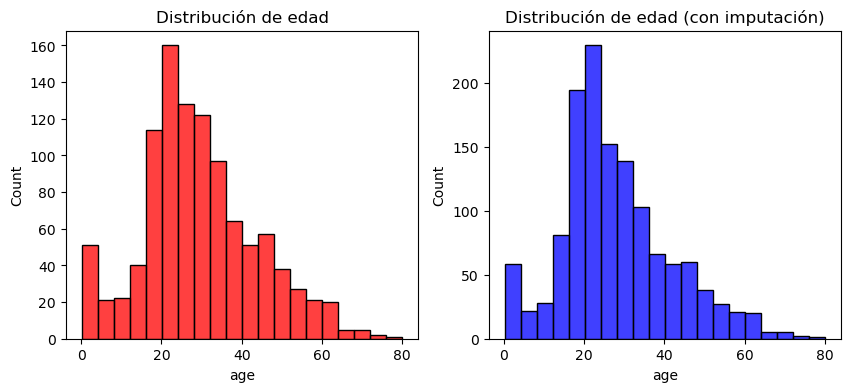

In [42]:
df_imput = df_imput.reset_index(drop=True)

var= ['survived', 'pclass', 'sex', 'age', 'alone', 'embarked_s',
       'embarked_c', 'title_1', 'title_2', 'title_3', 'title_4',
       'ln_fare', 'hombre_mayor']     
df_imput.columns = var

fig, axs= plt.subplots(1,2,figsize = (10,4))
sns.histplot(x = 'age', data = df      , bins = 20, color = 'red',  edgecolor = 'black', ax = axs[0])
sns.histplot(x = 'age', data = df_imput, bins = 20, color = 'blue', edgecolor = 'black', ax = axs[1])

axs[0].set_title('Distribución de edad')
axs[1].set_title('Distribución de edad (con imputación)')

plt.show()

In [43]:
# Entrenamiento del modelo

In [44]:
X = df_imput.drop(columns=['survived'])
Y = df_imput.survived

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42, test_size = 0.25)

In [46]:
#Creamos la instancia para la regresion
reg_log = LogisticRegression(random_state = 42)

In [47]:
reg_log.fit(X_train, Y_train)

C:\Users\PC SITOS\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [48]:
Y_pred = reg_log.predict(X_test)

In [49]:
m = metrics.confusion_matrix(Y_test, Y_pred)
m

array([[184,  17],
       [ 29,  98]], dtype=int64)

Text(0.5, 357.55555555555554, 'Predicted label')

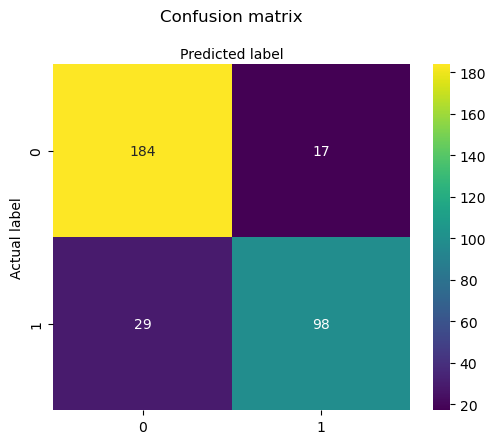

In [50]:
#Visualizando la matriz de confusión usando Heatmap
class_names = [0,1]
fig, ax = plt.subplots(figsize=(5,4))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# # create heatmap
sns.heatmap(pd.DataFrame(m), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [51]:
### Indicadores de la matriz de confusión
target_names = ['No sobrevivió', 'Si sobrevivió']
print(classification_report(Y_test, Y_pred, target_names=target_names))

               precision    recall  f1-score   support

No sobrevivió       0.86      0.92      0.89       201
Si sobrevivió       0.85      0.77      0.81       127

     accuracy                           0.86       328
    macro avg       0.86      0.84      0.85       328
 weighted avg       0.86      0.86      0.86       328



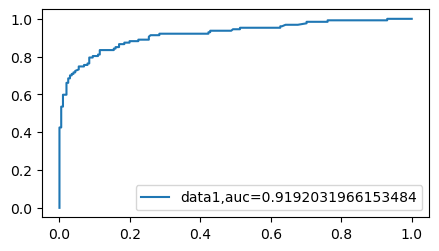

In [52]:
#Curva ROC
y_pred_proba = reg_log.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.figure(figsize = (5,2.7))
plt.plot(fpr, tpr, label="data1,auc="+str(auc))
plt.legend(loc=4)

plt.show()